# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow.keras as keras

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Data

In [2]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [4]:
print(X_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


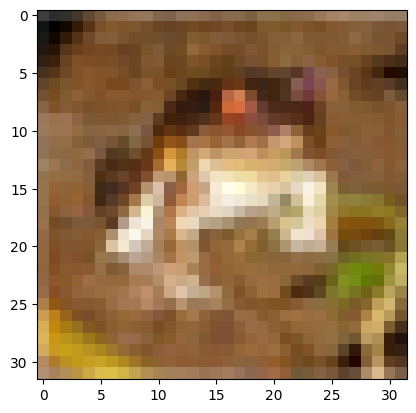

In [5]:
plt.imshow(X_train[0])

In [6]:
y_train[0]

array([6], dtype=uint8)

In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Let's have some fun and see what these labels refer to using scaping by selenium

In [8]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.7e71rjImvF/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.Il1rwqHrRW/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.qUaebxGPJ1/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

In [9]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

options = Options()
options.add_argument("--headless") # or use pyvirtualdiplay
options.add_argument("--no-sandbox") # needed, because colab runs as root
options.headless = True

driver = webdriver.Chrome(service=Service(executable_path="/usr/bin/chromedriver"), options=options)
driver.get('https://keras.io/api/datasets/cifar10/')


labels = driver.find_elements(By.XPATH,"//td")

print()
for label in labels:
  print(label.text)

<ipython-input-9-5bf4e5feb7a6>:9: DeprecationWarning: headless property is deprecated, instead use add_argument('--headless') or add_argument('--headless=new')
  options.headless = True



0
airplane
1
automobile
2
bird
3
cat
4
deer
5
dog
6
frog
7
horse
8
ship
9
truck


In [10]:
labels_dict = {}

for label_code, label_category in zip(labels[::2], labels[1::2]):
  labels_dict[int(label_code.text)] = label_category.text

labels_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [11]:
y_train_categories = list(map(lambda i: labels_dict[i], y_train.flatten()))
y_test_categories = list(map(lambda i: labels_dict[i], y_test.flatten()))

In [12]:
y_train_categories

['frog',
 'truck',
 'truck',
 'deer',
 'automobile',
 'automobile',
 'bird',
 'horse',
 'ship',
 'cat',
 'deer',
 'horse',
 'horse',
 'bird',
 'truck',
 'truck',
 'truck',
 'cat',
 'bird',
 'frog',
 'deer',
 'cat',
 'frog',
 'frog',
 'bird',
 'frog',
 'cat',
 'dog',
 'deer',
 'airplane',
 'airplane',
 'truck',
 'automobile',
 'cat',
 'deer',
 'airplane',
 'cat',
 'horse',
 'cat',
 'cat',
 'dog',
 'bird',
 'bird',
 'horse',
 'automobile',
 'automobile',
 'automobile',
 'bird',
 'bird',
 'airplane',
 'truck',
 'dog',
 'horse',
 'truck',
 'bird',
 'bird',
 'dog',
 'bird',
 'deer',
 'cat',
 'automobile',
 'automobile',
 'ship',
 'bird',
 'automobile',
 'automobile',
 'deer',
 'truck',
 'horse',
 'ship',
 'dog',
 'truck',
 'frog',
 'horse',
 'cat',
 'automobile',
 'truck',
 'airplane',
 'cat',
 'automobile',
 'cat',
 'dog',
 'deer',
 'dog',
 'horse',
 'horse',
 'deer',
 'horse',
 'truck',
 'deer',
 'bird',
 'cat',
 'ship',
 'airplane',
 'automobile',
 'frog',
 'automobile',
 'automobile',
 

Show unique values

In [13]:
set(y_train_categories)

{'airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck'}

# Visualize Data

##### Train

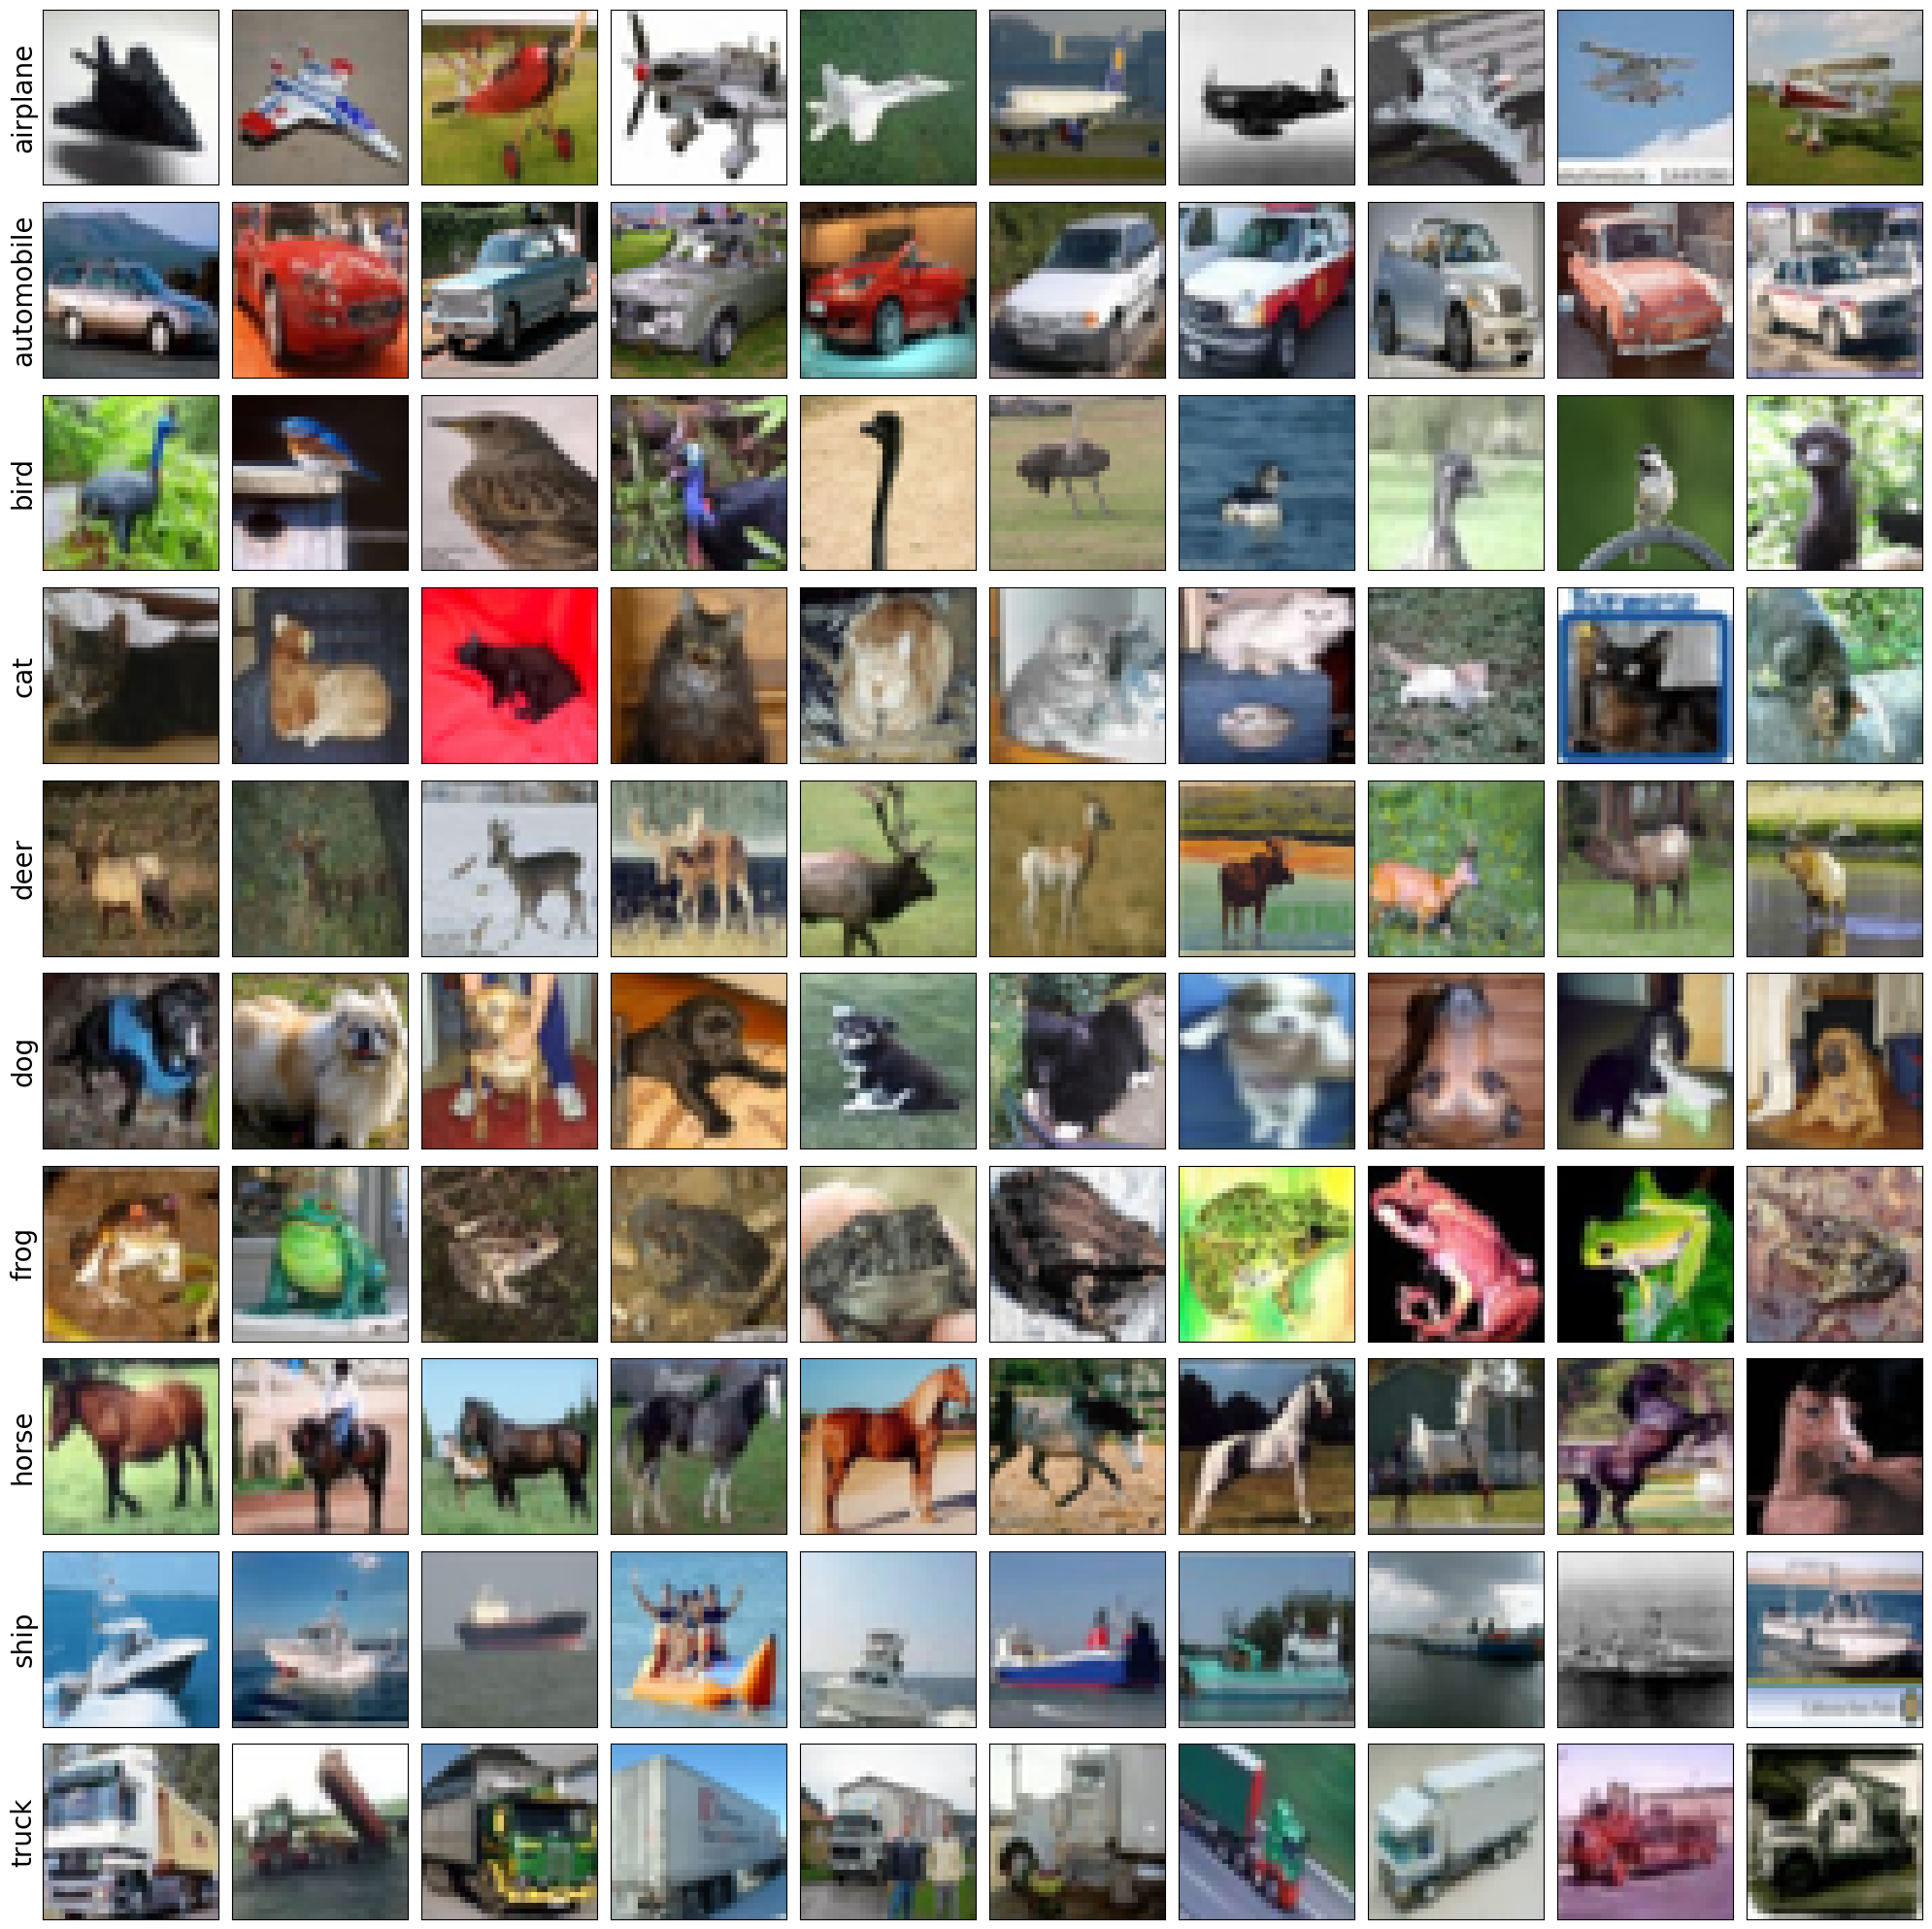

In [14]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))

labels = np.unique(y_train)

for i, label in enumerate(labels):
  class_indices = np.where(y_train.flatten() == label)[0]

  for j, class_index in enumerate(class_indices[:10]):
    ax[i, j].imshow(X_train[class_index])
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

    if j == 0 :
      ax[i, j].set_ylabel(y_train_categories[class_index], fontsize=20)

plt.tight_layout()        

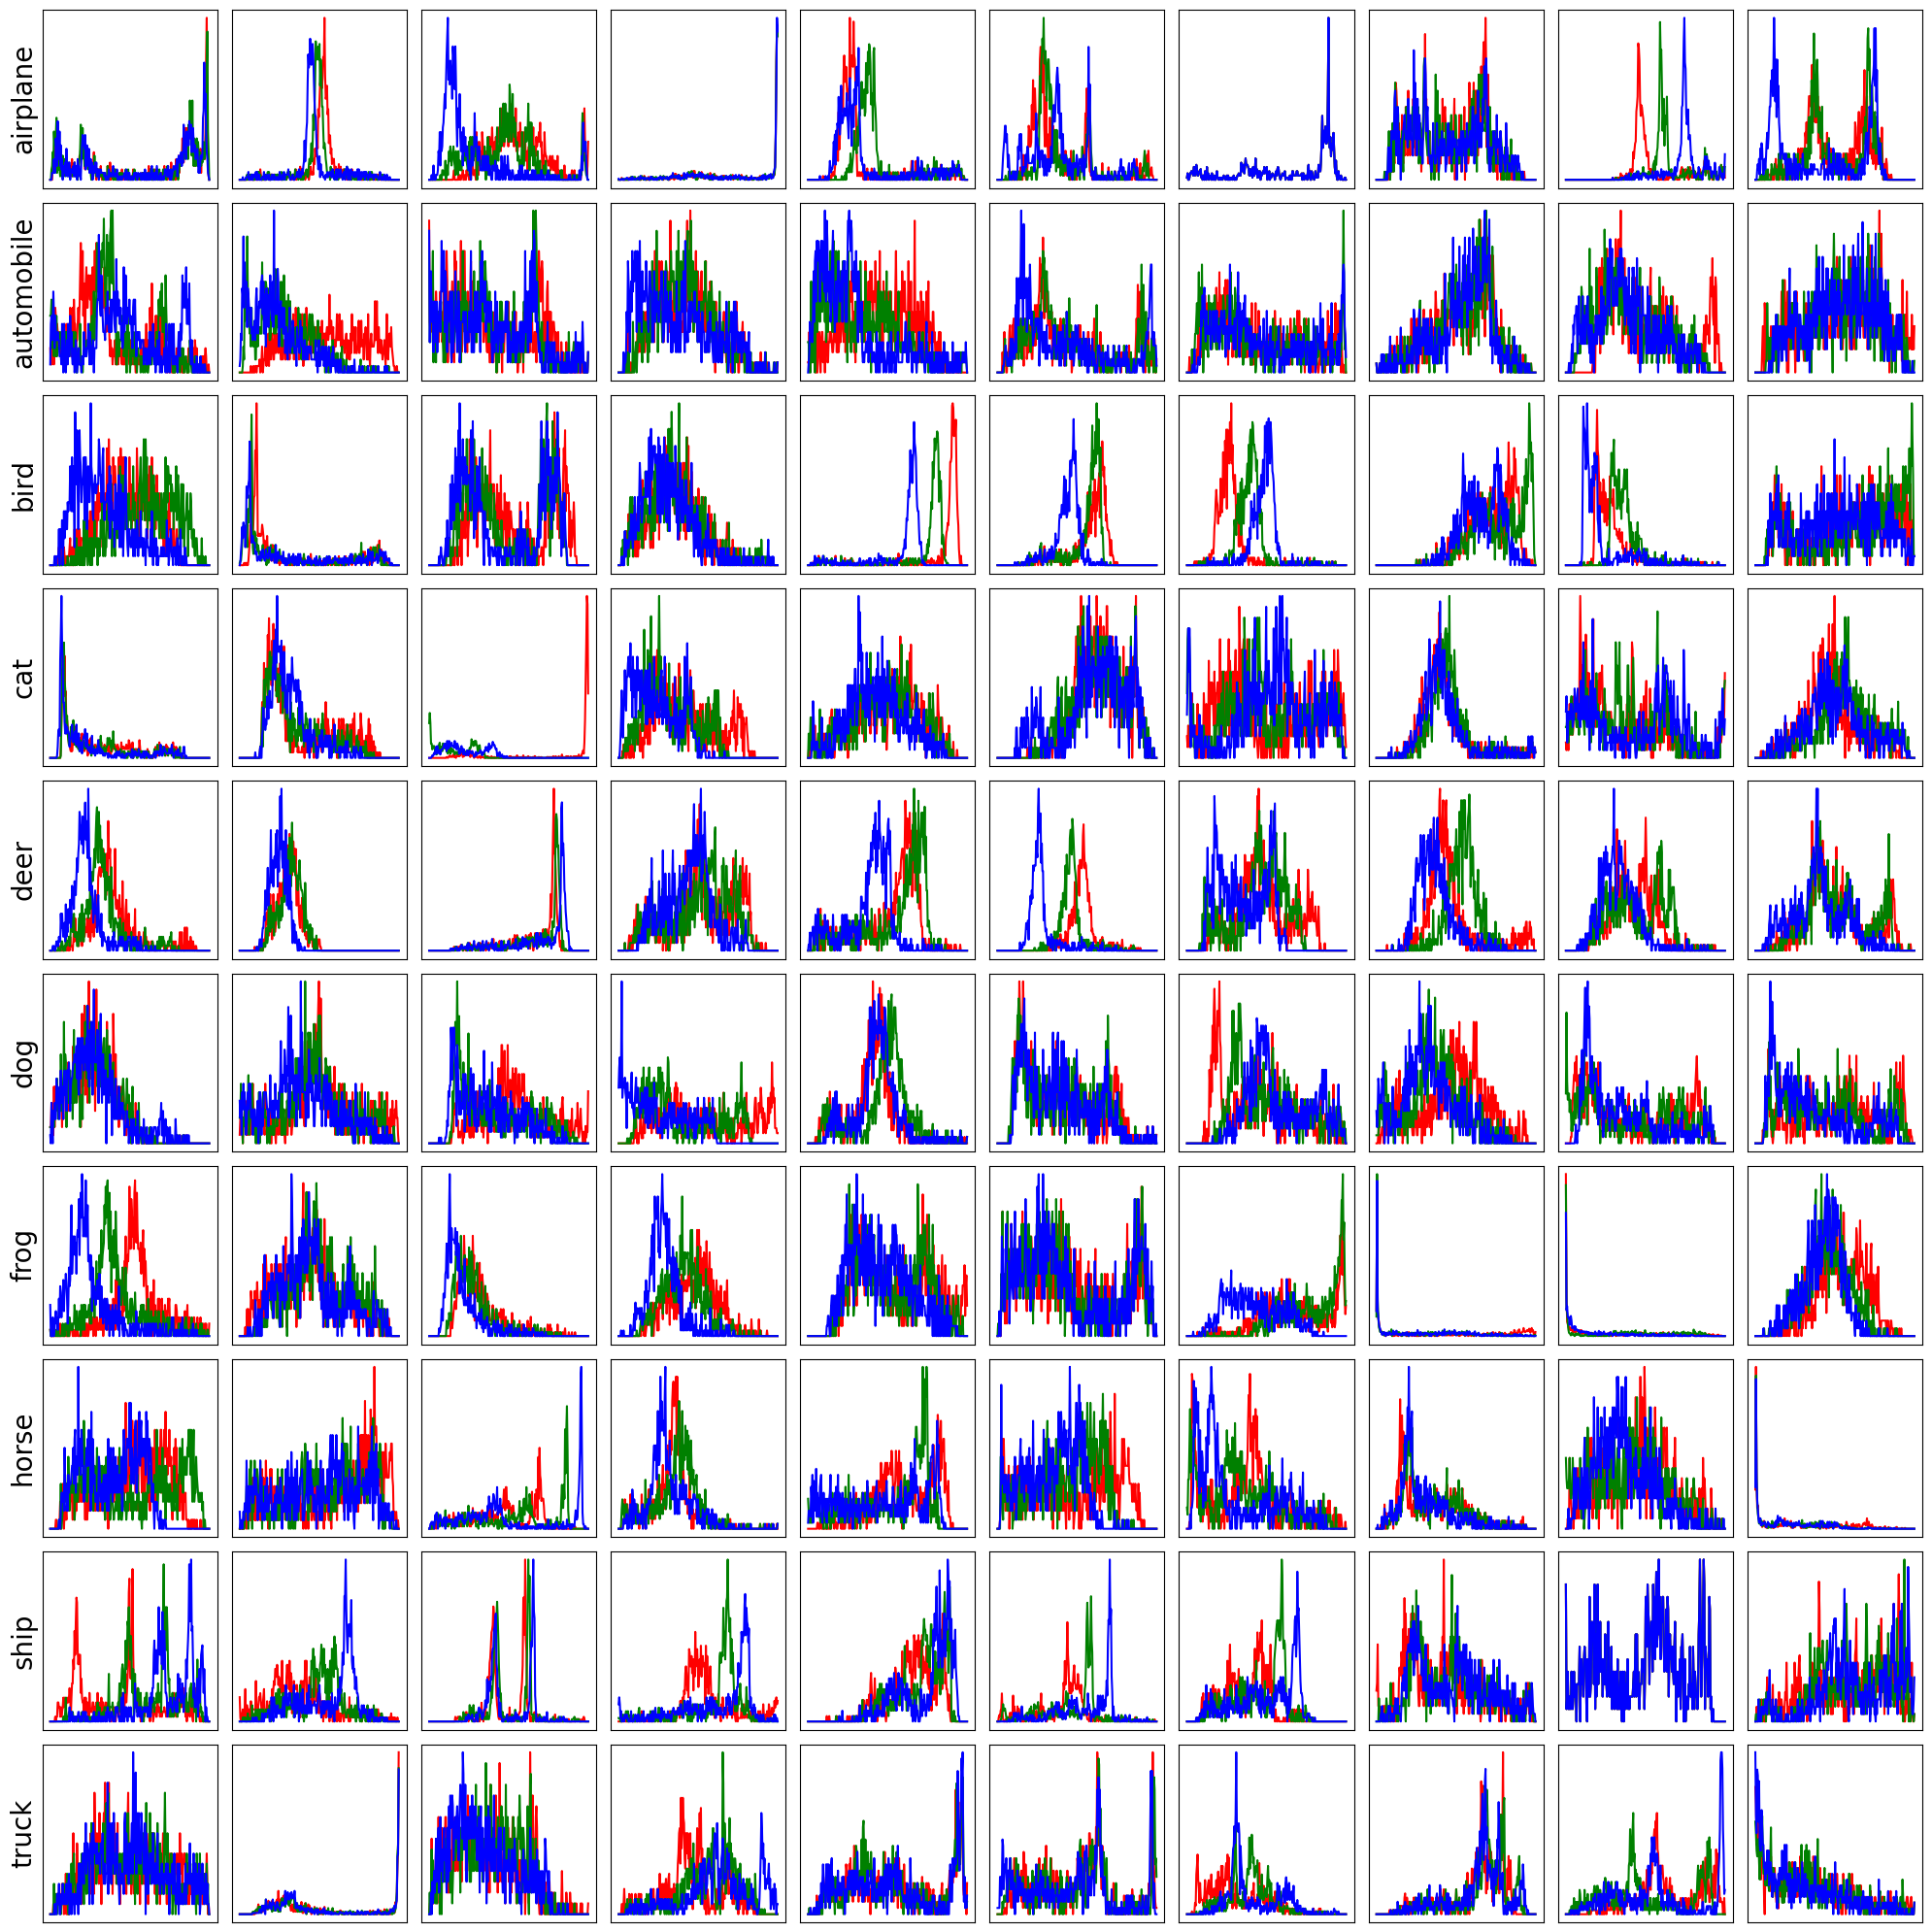

In [15]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))

labels = np.unique(y_train)
colors = ('r', 'g', 'b')

for i, label in enumerate(labels):
  class_indices = np.where(y_train.flatten() == label)[0]

  for j, class_index in enumerate(class_indices[:10]):
    
    # plot distribution of each channel
    for c, col in enumerate(colors):
      hist = cv2.calcHist([X_train[class_index]], [c], None, [256], [0, 256])
      ax[i, j].plot(hist, color=col)
    
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].set_ylabel('')

    if j == 0 :
      ax[i, j].set_ylabel(y_train_categories[class_index], fontsize=20)

plt.tight_layout()

##### Test

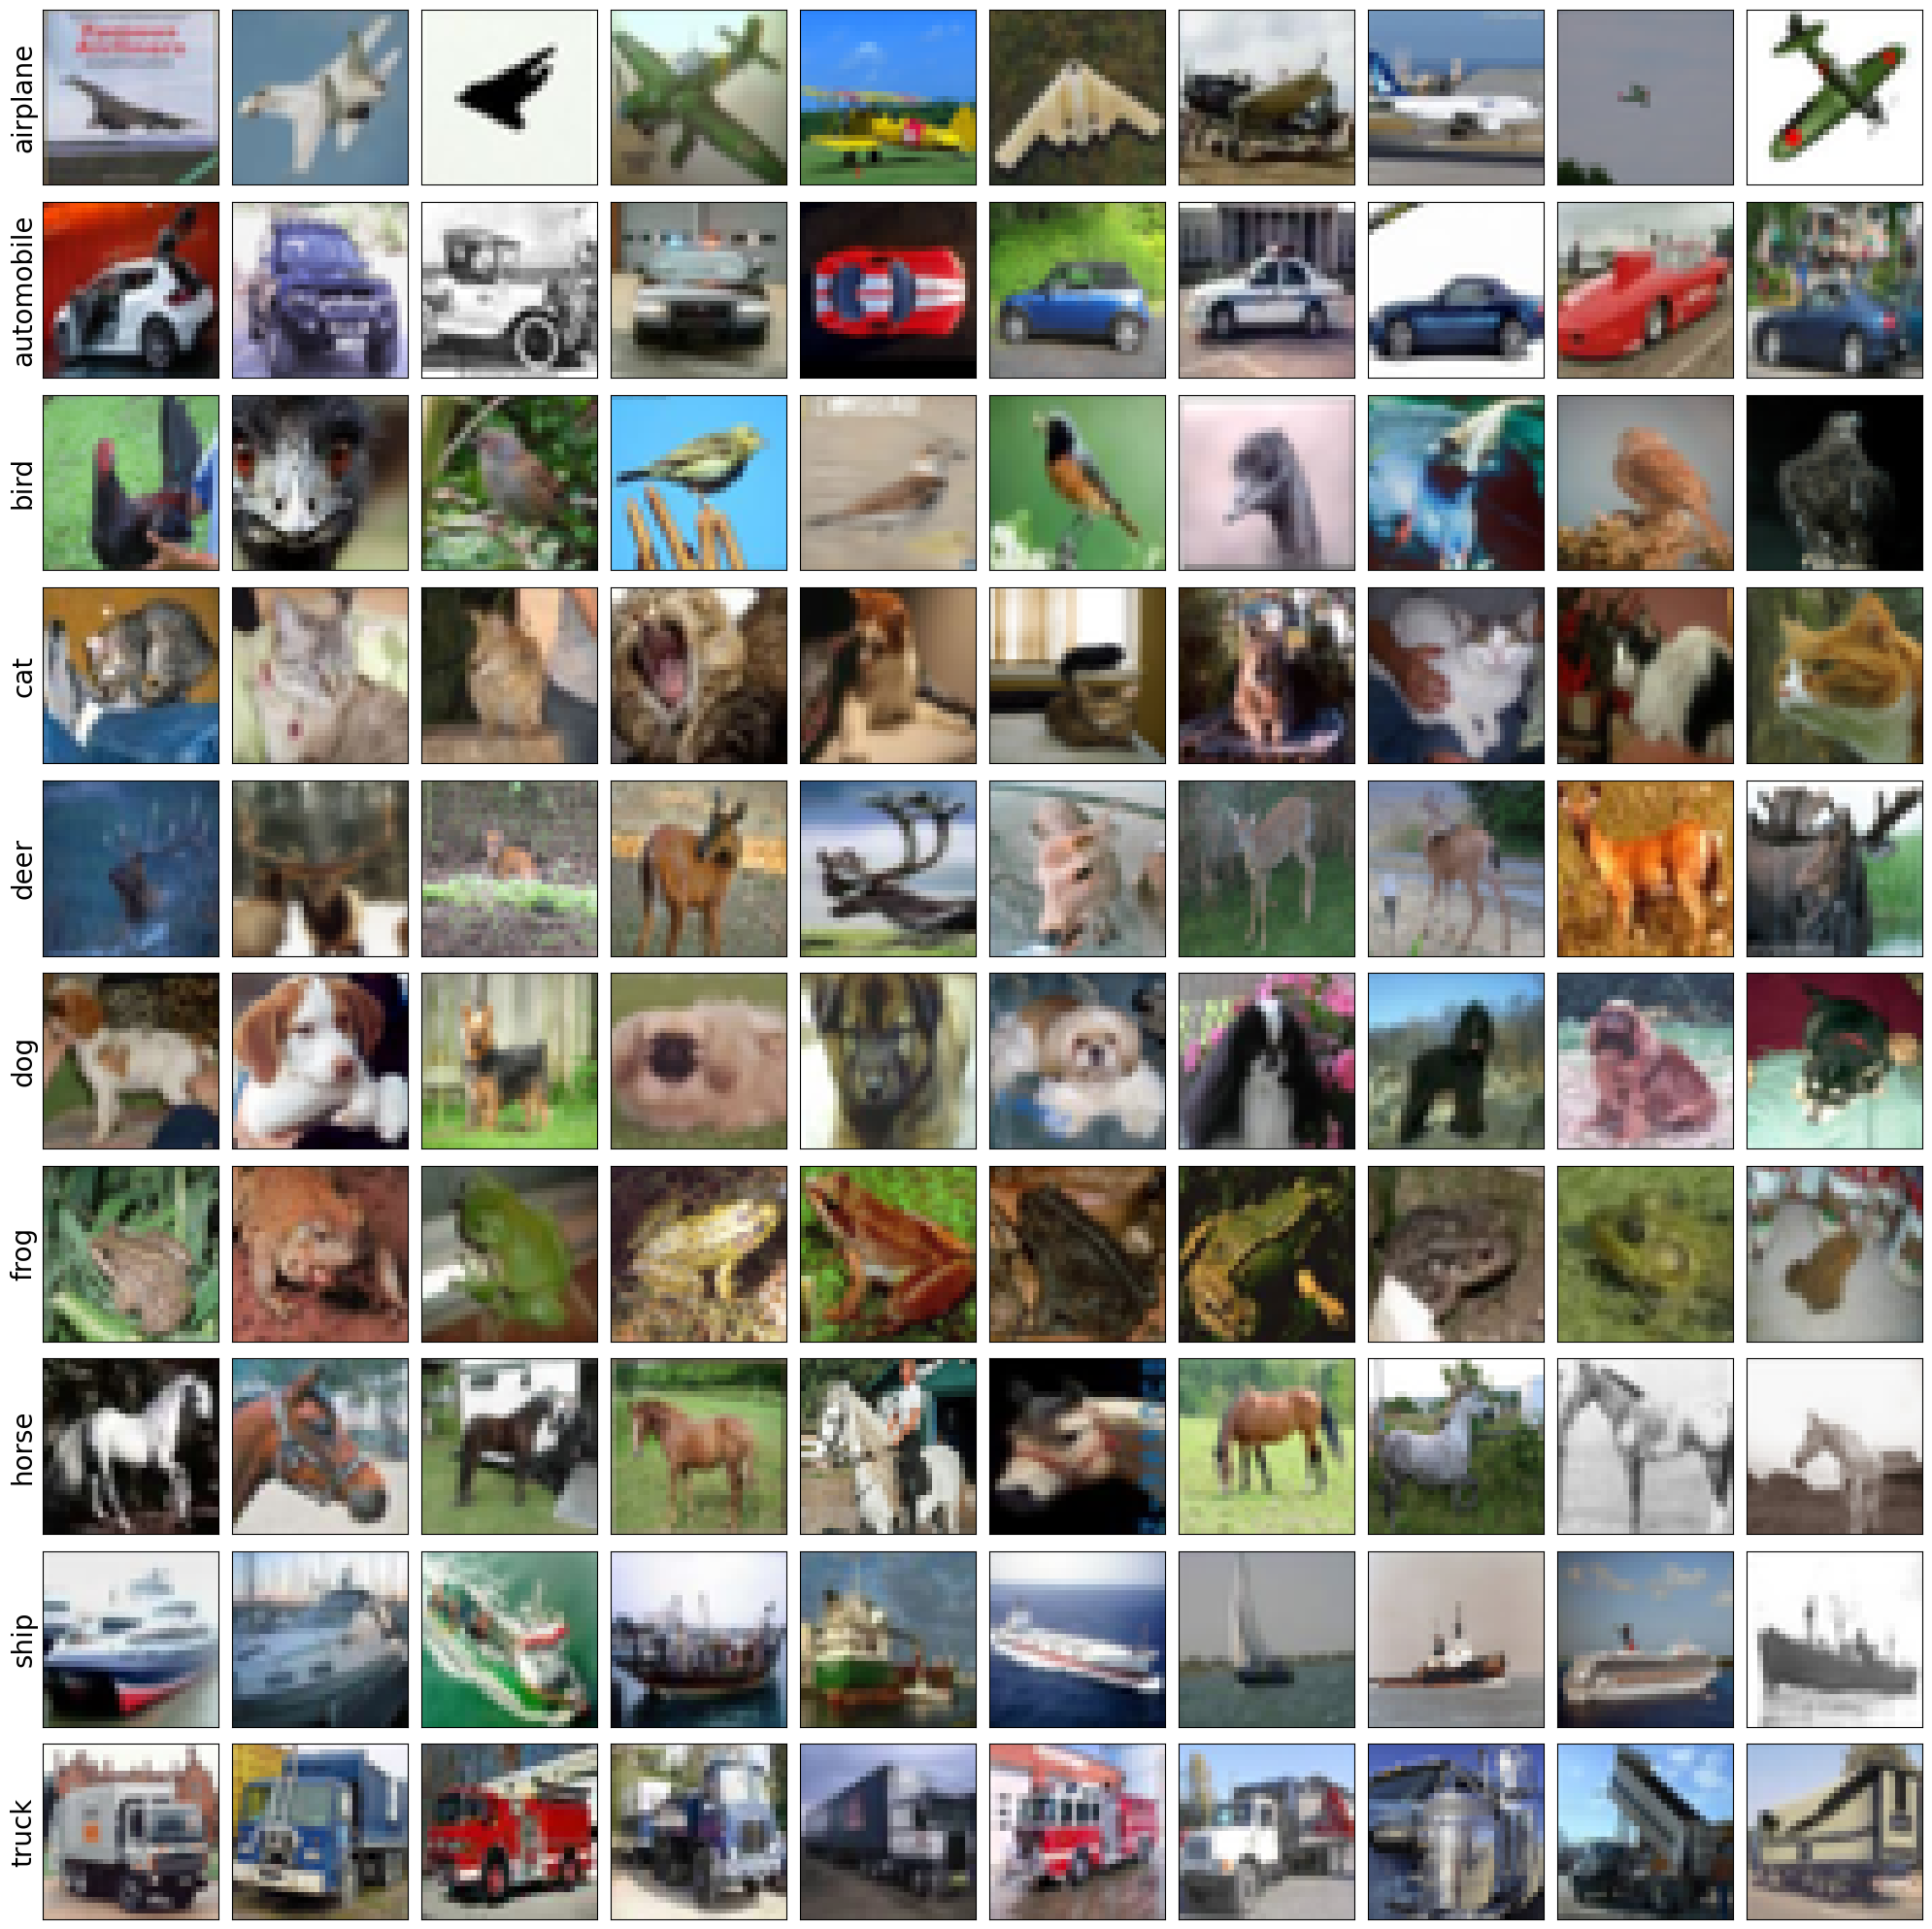

In [16]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))

labels = np.unique(y_test)

for i, label in enumerate(labels):
  class_indices = np.where(y_test.flatten() == label)[0]

  for j, class_index in enumerate(class_indices[:10]):
    ax[i, j].imshow(X_test[class_index])
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

    if j == 0 :
      ax[i, j].set_ylabel(y_test_categories[class_index], fontsize=20)

plt.tight_layout()        

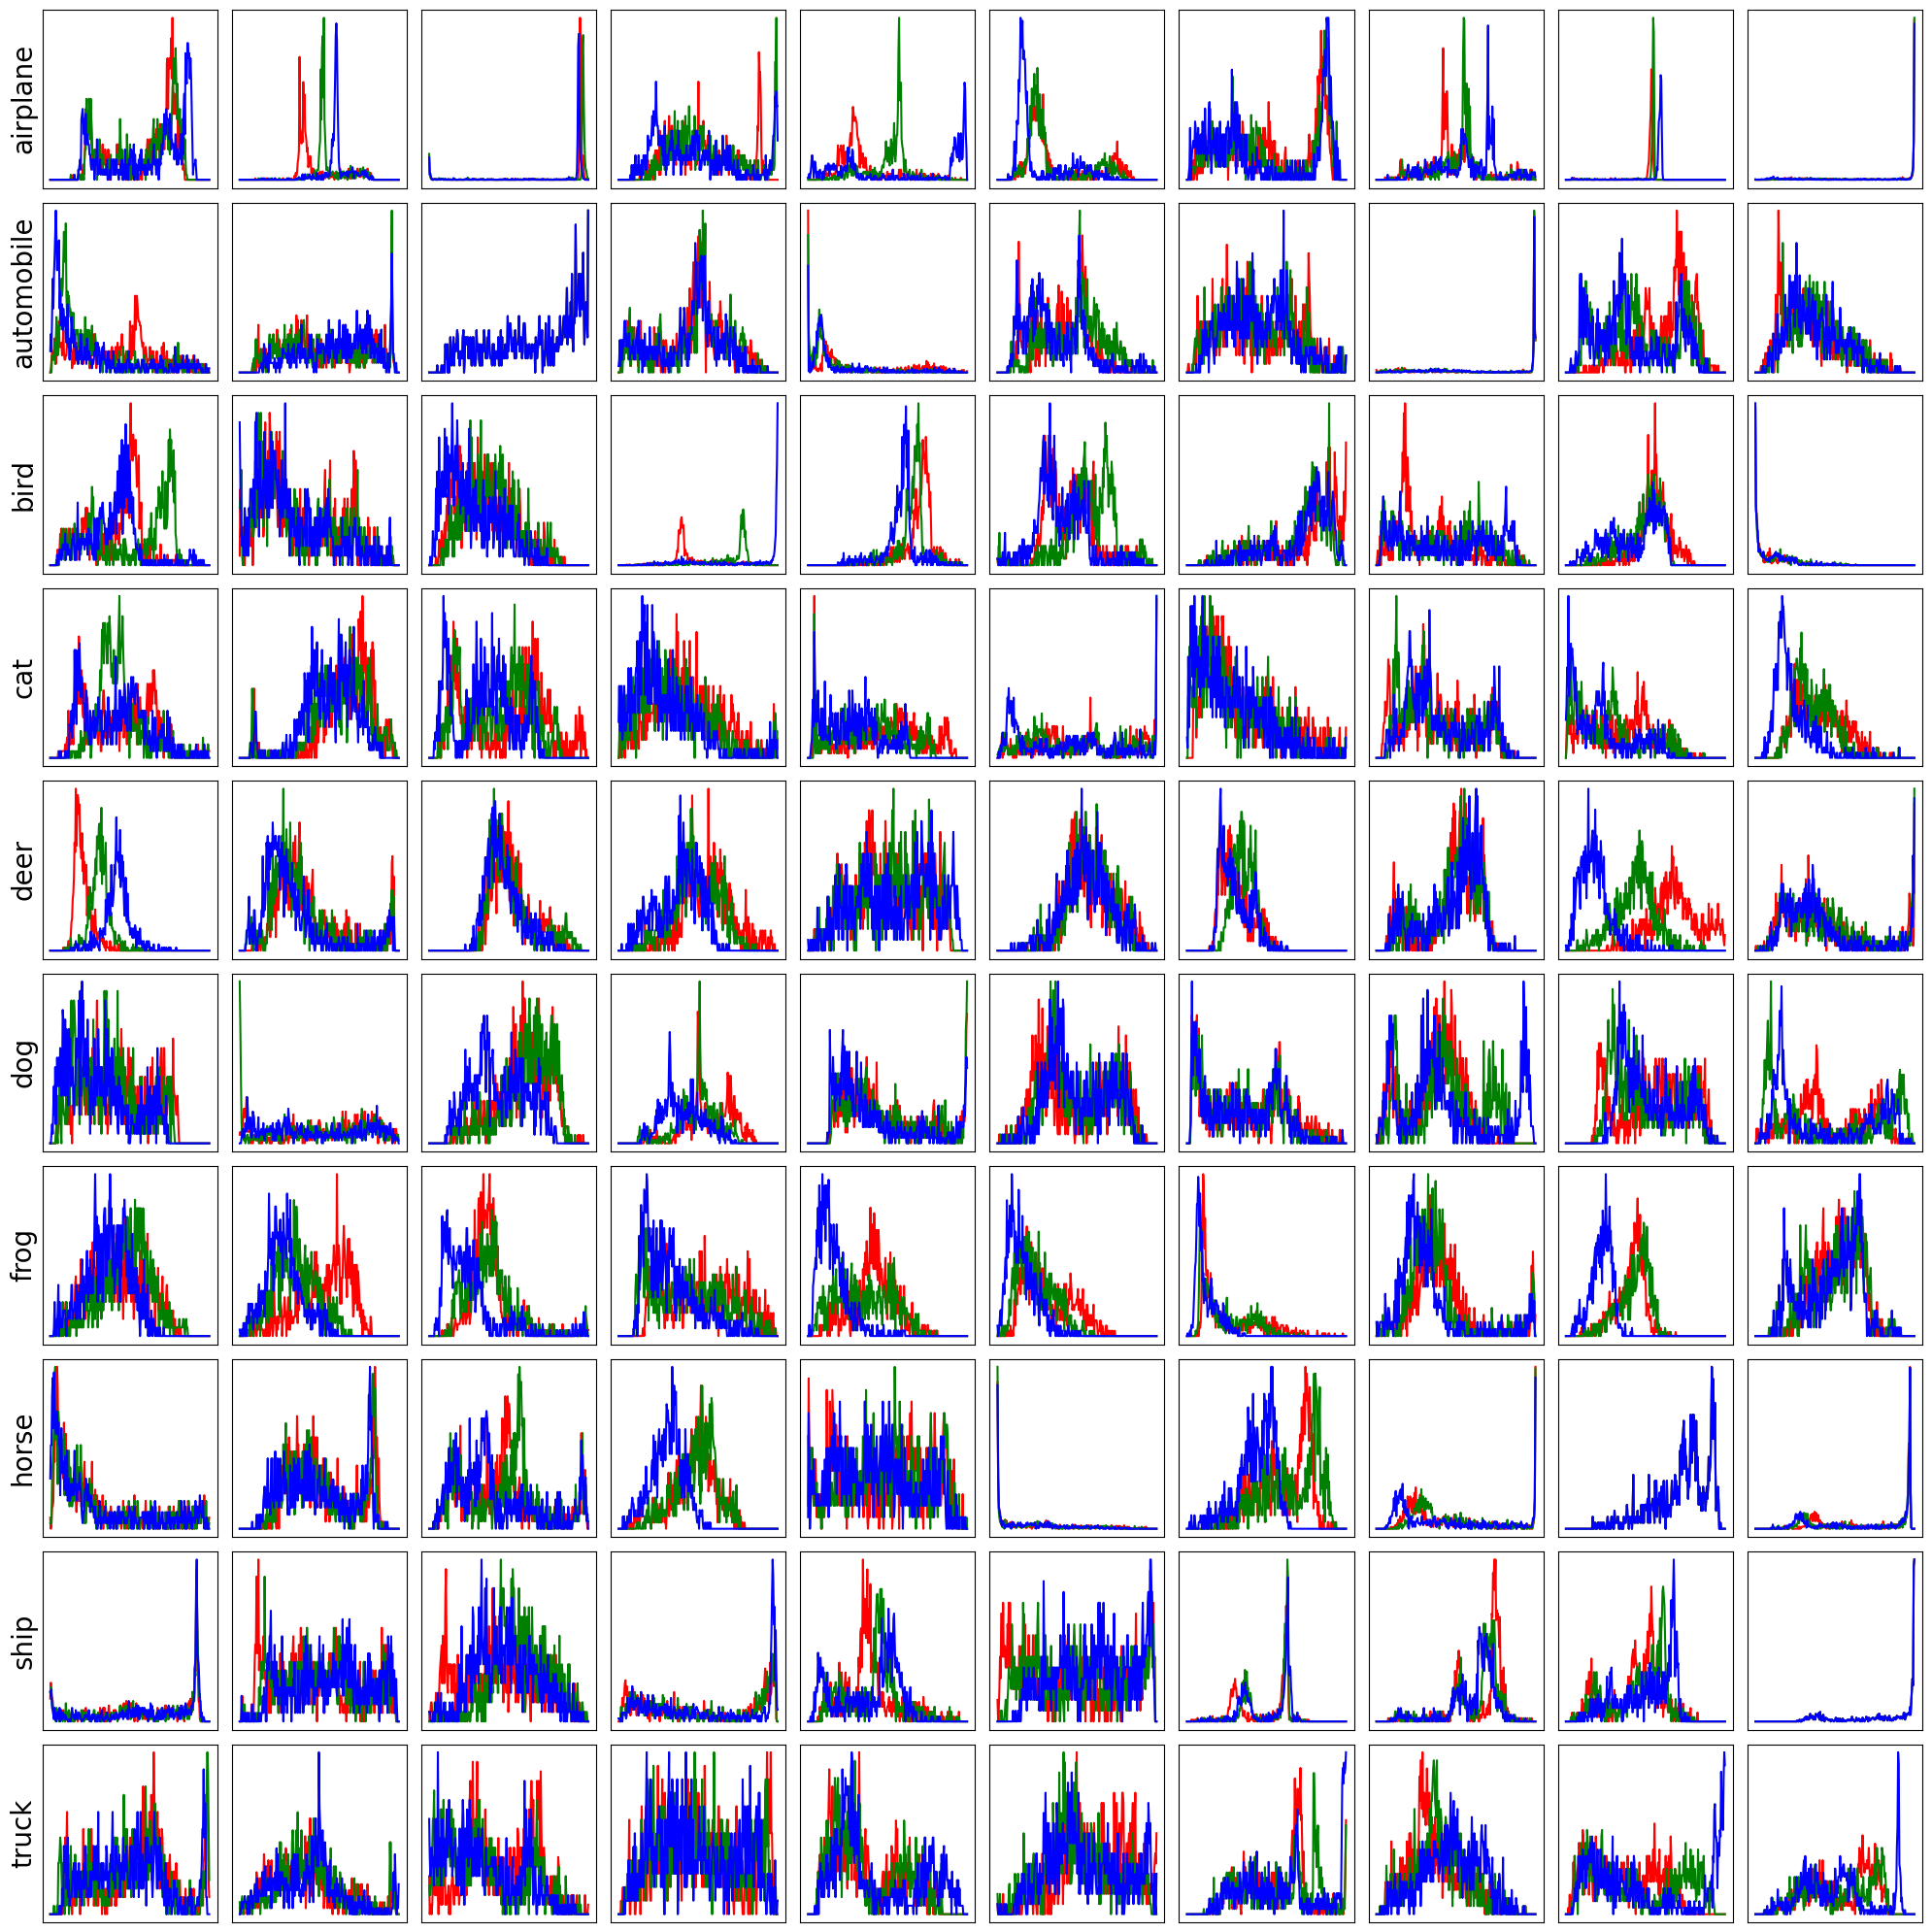

In [17]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))

labels = np.unique(y_test)
colors = ('r', 'g', 'b')

for i, label in enumerate(labels):
  class_indices = np.where(y_test.flatten() == label)[0]

  for j, class_index in enumerate(class_indices[:10]):
    
    # plot distribution of each channel
    for c, col in enumerate(colors):
      hist = cv2.calcHist([X_test[class_index]], [c], None, [256], [0, 256])
      ax[i, j].plot(hist, color=col)
    
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].set_ylabel('')

    if j == 0 :
      ax[i, j].set_ylabel(y_test_categories[class_index], fontsize=20)

plt.tight_layout()

# Label Encoding

In [18]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
y_train.shape

(50000, 10)

# Data Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

In [21]:
print(X_train.shape)
print(y_train.shape)

(40000, 32, 32, 3)
(40000, 10)


In [22]:
print(X_validation.shape)
print(y_validation.shape)

(10000, 32, 32, 3)
(10000, 10)


# Model

## Baseline

In [23]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))#, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [25]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
history = model.fit(
      X_train.astype('float32')/255, y_train,
      epochs=30,
      validation_data=(X_validation.astype('float32')/255, y_validation))

Epoch 1/30
1250/1250 [==============================] - 15s 7ms/step - loss: 1.4977 - accuracy: 0.4448 - val_loss: 1.1533 - val_accuracy: 0.5827
Epoch 2/30
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0472 - accuracy: 0.6277 - val_loss: 0.9985 - val_accuracy: 0.6495
Epoch 3/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8643 - accuracy: 0.6943 - val_loss: 0.9087 - val_accuracy: 0.6855
Epoch 4/30
1250/1250 [==============================] - 8s 6ms/step - loss: 0.7293 - accuracy: 0.7424 - val_loss: 0.8539 - val_accuracy: 0.7078
Epoch 5/30
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6274 - accuracy: 0.7765 - val_loss: 0.8290 - val_accuracy: 0.7201
Epoch 6/30
1250/1250 [==============================] - 9s 7ms/step - loss: 0.5306 - accuracy: 0.8141 - val_loss: 0.9416 - val_accuracy: 0.6854
Epoch 7/30
1250/1250 [==============================] - 10s 8ms/step - loss: 0.4444 - accuracy: 0.8410 - val_loss: 0.8510 - val_accurac

In [32]:
model.evaluate(X_test.astype('float32')/255, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 2.2559 - accuracy: 0.7092


[2.255946397781372, 0.7092000246047974]

##### Train VS Validation

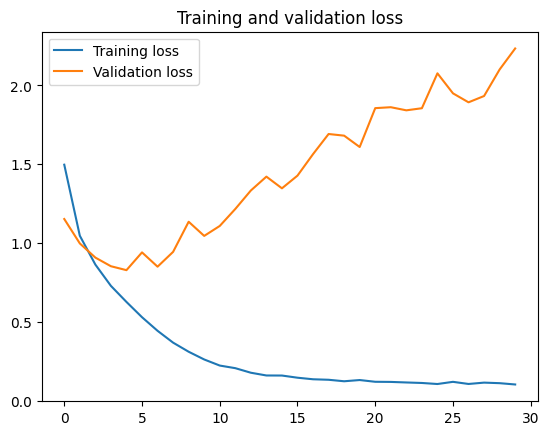

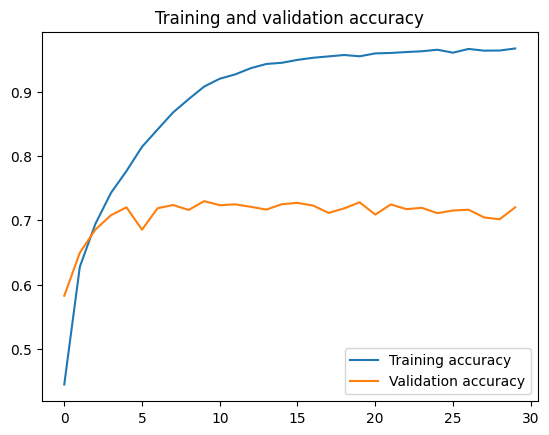

In [33]:
accuracy = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

plt.plot(accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

##### Save model

In [34]:
model.save('/content/drive/MyDrive/cifar10_baseline.h5')

As shown in the above graph, there is `overfitting`. Therefore, it is advisable to try `data augmentation`.

## ETL Pipeline for Baseline

In [36]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')

# validation and test data should not be augmented !
validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# Fetching data from memory using flow()
train_generator = train_datagen.flow(
                                     X_train, y_train, 
                                     batch_size=128)

validation_generator = validation_datagen.flow(
                                     X_validation, y_validation, 
                                     batch_size=128)

test_generator = test_datagen.flow(
                                   X_test,
                                   y_test,
                                   batch_size=128)

## Baseline with data augmentation

In [37]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))#, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 128)       

In [41]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

Epoch 1/30
313/313 [==============================] - 32s 96ms/step - loss: 1.6540 - accuracy: 0.3959 - val_loss: 1.4703 - val_accuracy: 0.4726
Epoch 2/30
313/313 [==============================] - 28s 90ms/step - loss: 1.4827 - accuracy: 0.4595 - val_loss: 1.2520 - val_accuracy: 0.5509
Epoch 3/30
313/313 [==============================] - 27s 87ms/step - loss: 1.3671 - accuracy: 0.5053 - val_loss: 1.2682 - val_accuracy: 0.5500
Epoch 4/30
313/313 [==============================] - 28s 89ms/step - loss: 1.2960 - accuracy: 0.5346 - val_loss: 1.1562 - val_accuracy: 0.5963
Epoch 5/30
313/313 [==============================] - 27s 87ms/step - loss: 1.2349 - accuracy: 0.5553 - val_loss: 1.0257 - val_accuracy: 0.6336
Epoch 6/30
313/313 [==============================] - 27s 87ms/step - loss: 1.1781 - accuracy: 0.5754 - val_loss: 1.0777 - val_accuracy: 0.6262
Epoch 7/30
313/313 [==============================] - 29s 92ms/step - loss: 1.1402 - accuracy: 0.5964 - val_loss: 1.0255 - val_accuracy:

In [43]:
model.evaluate(test_generator)

79/79 [==============================] - 1s 13ms/step - loss: 0.7788 - accuracy: 0.7369


[0.7787514925003052, 0.7368999719619751]

##### Train VS Validation

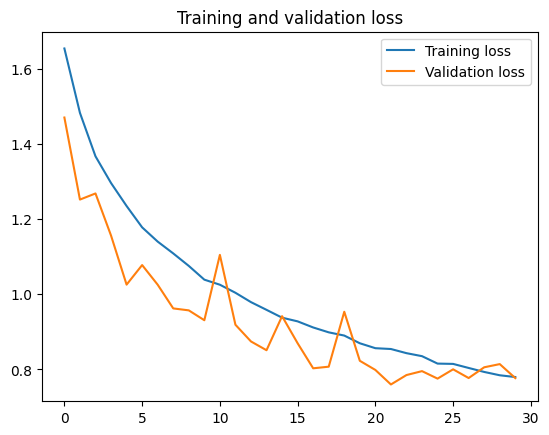

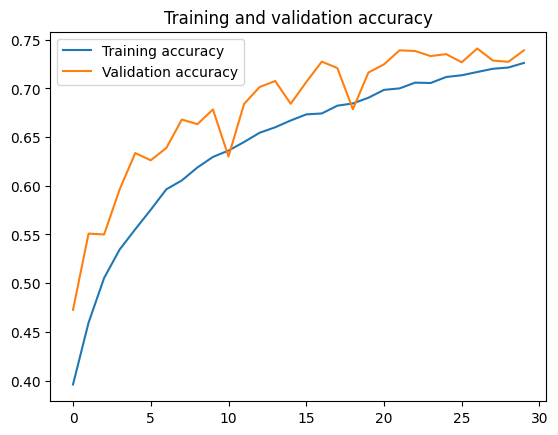

In [44]:
accuracy = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

plt.plot(accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

##### Save model

In [45]:
model.save('/content/drive/MyDrive/cifar10_baseline_data_augmentation.h5')

Now that we have solved the overfitting problem, let's try to improve the model using `transfer learning`.

## Transfer Learning

In [46]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top = False,
                  input_shape=(32, 32, 3))

conv_base.trainable = False

In [47]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [48]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [50]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
history = model.fit(
      X_train.astype('float32')/255, y_train,
      epochs=30,
      validation_data=(X_validation.astype('float32')/255, y_validation),
      )

Epoch 1/30
1250/1250 [==============================] - 17s 13ms/step - loss: 1.3736 - accuracy: 0.5185 - val_loss: 1.2732 - val_accuracy: 0.5568
Epoch 2/30
1250/1250 [==============================] - 13s 10ms/step - loss: 1.1879 - accuracy: 0.5849 - val_loss: 1.1884 - val_accuracy: 0.5875
Epoch 3/30
1250/1250 [==============================] - 13s 10ms/step - loss: 1.1250 - accuracy: 0.6065 - val_loss: 1.1772 - val_accuracy: 0.5875
Epoch 4/30
1250/1250 [==============================] - 13s 10ms/step - loss: 1.0722 - accuracy: 0.6246 - val_loss: 1.1443 - val_accuracy: 0.5950
Epoch 5/30
1250/1250 [==============================] - 12s 10ms/step - loss: 1.0303 - accuracy: 0.6385 - val_loss: 1.1287 - val_accuracy: 0.6083
Epoch 6/30
1250/1250 [==============================] - 12s 10ms/step - loss: 0.9926 - accuracy: 0.6494 - val_loss: 1.1141 - val_accuracy: 0.6135
Epoch 7/30
1250/1250 [==============================] - 12s 10ms/step - loss: 0.9557 - accuracy: 0.6633 - val_loss: 1.1170 -

In [52]:
model.evaluate(X_test.astype('float32')/255, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.5577 - accuracy: 0.5936


[1.5577278137207031, 0.5935999751091003]

##### Train VS Validation

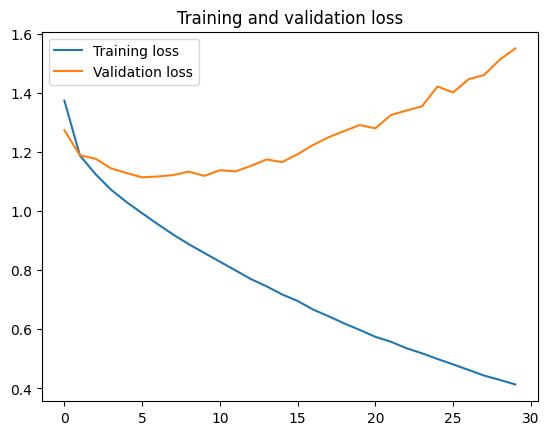

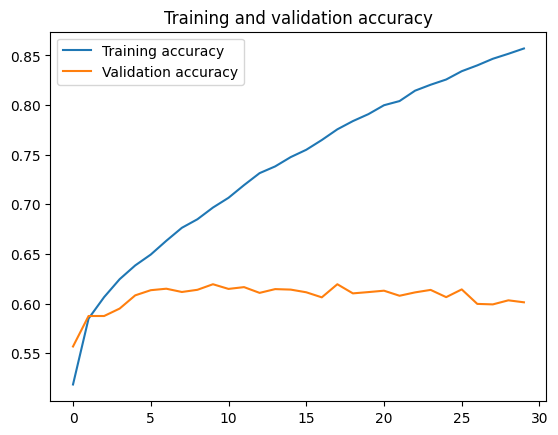

In [53]:
accuracy = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

plt.plot(accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

##### Save model

In [54]:
model.save('/content/drive/MyDrive/cifar10_tf.h5')

Let's try `Fine-tuning` to improve model performance

## Fine-tuning

In [78]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top = False,
                  input_shape=(32, 32, 3))

In [79]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [80]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [81]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 14,848,586
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
history = model.fit(
      X_train.astype('float32')/255, y_train,
      epochs=5,
      validation_data=(X_validation.astype('float32')/255, y_validation),
      )

Epoch 1/5
1250/1250 [==============================] - 43s 29ms/step - loss: 1.8074 - accuracy: 0.2783 - val_loss: 1.4990 - val_accuracy: 0.4003
Epoch 2/5
1250/1250 [==============================] - 36s 29ms/step - loss: 1.3590 - accuracy: 0.4798 - val_loss: 1.3289 - val_accuracy: 0.5050
Epoch 3/5
1250/1250 [==============================] - 36s 28ms/step - loss: 1.1076 - accuracy: 0.5988 - val_loss: 1.0201 - val_accuracy: 0.6380
Epoch 4/5
1250/1250 [==============================] - 36s 28ms/step - loss: 0.9265 - accuracy: 0.6770 - val_loss: 0.9600 - val_accuracy: 0.6718
Epoch 5/5
1250/1250 [==============================] - 36s 28ms/step - loss: 0.8055 - accuracy: 0.7232 - val_loss: 0.8581 - val_accuracy: 0.7131


In [84]:
conv_base.trainable = True

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
      break
    else:
        layer.trainable = False

In [85]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 7,213,322
Non-trainable params: 7,635,264
_________________________________________________________________


In [86]:
history = model.fit(
      X_train.astype('float32')/255, y_train,
      epochs=30,
      validation_data=(X_validation.astype('float32')/255, y_validation),
      )

Epoch 1/30
1250/1250 [==============================] - 36s 29ms/step - loss: 0.7153 - accuracy: 0.7591 - val_loss: 0.8541 - val_accuracy: 0.7275
Epoch 2/30
1250/1250 [==============================] - 35s 28ms/step - loss: 0.6529 - accuracy: 0.7789 - val_loss: 0.8410 - val_accuracy: 0.7274
Epoch 3/30
1250/1250 [==============================] - 35s 28ms/step - loss: 0.5730 - accuracy: 0.8098 - val_loss: 0.7512 - val_accuracy: 0.7556
Epoch 4/30
1250/1250 [==============================] - 35s 28ms/step - loss: 0.5201 - accuracy: 0.8276 - val_loss: 0.8001 - val_accuracy: 0.7591
Epoch 5/30
1250/1250 [==============================] - 35s 28ms/step - loss: 0.5256 - accuracy: 0.8255 - val_loss: 0.7635 - val_accuracy: 0.7625
Epoch 6/30
1250/1250 [==============================] - 35s 28ms/step - loss: 0.4314 - accuracy: 0.8587 - val_loss: 0.7654 - val_accuracy: 0.7642
Epoch 7/30
1250/1250 [==============================] - 35s 28ms/step - loss: 0.3847 - accuracy: 0.8733 - val_loss: 0.8598 -

In [87]:
model.evaluate(X_test.astype('float32')/255, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.0261 - accuracy: 0.7889


[1.0261046886444092, 0.7889000177383423]

##### Train VS Validation

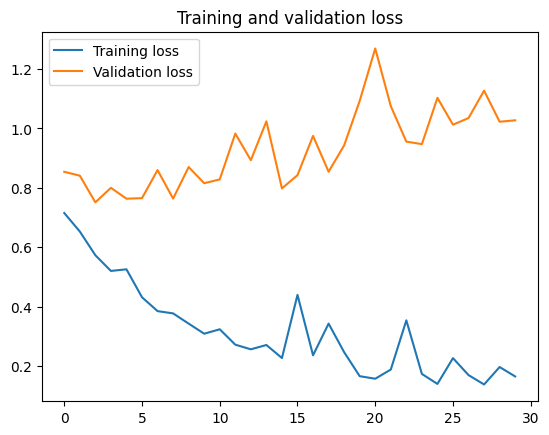

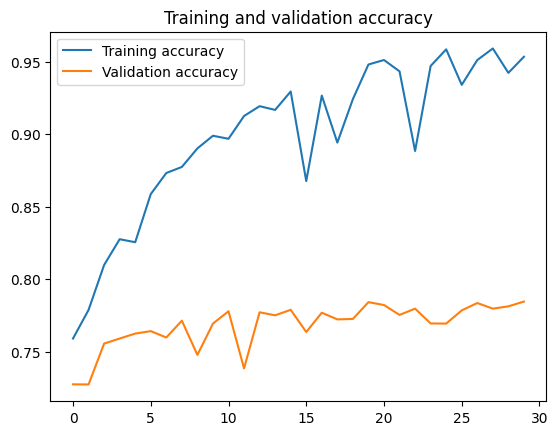

In [88]:
accuracy = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

plt.plot(accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

##### Save model

In [89]:
model.save('/content/drive/MyDrive/cifar10_fine_tuning.h5')

As shown in the above graph, there is `overfitting`. Therefore, let's to try `transfer Learnig with data augmentation`.

## ETL Pipeline for Transfer Learning

In [55]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input

train_datagen = ImageDataGenerator(
                # rescale=1/255,
                preprocessing_function=preprocess_input,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')

# validation and test data should not be augmented !
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Fetching data from memory using flow()
train_generator = train_datagen.flow(
                                     X_train, y_train, 
                                     batch_size=128)

validation_generator = validation_datagen.flow(
                                     X_validation, y_validation, 
                                     batch_size=128)

test_generator = test_datagen.flow(
                                   X_test, y_test,
                                   batch_size=128)

## Transfer Learning with data augmentation

In [56]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top = False,
                  input_shape=(32, 32, 3))

conv_base.trainable = False

In [57]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [58]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [60]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator,
      )

Epoch 1/30
313/313 [==============================] - 34s 100ms/step - loss: 3.0418 - accuracy: 0.4136 - val_loss: 1.5035 - val_accuracy: 0.5196
Epoch 2/30
313/313 [==============================] - 32s 101ms/step - loss: 1.4594 - accuracy: 0.4999 - val_loss: 1.2744 - val_accuracy: 0.5685
Epoch 3/30
313/313 [==============================] - 30s 97ms/step - loss: 1.3242 - accuracy: 0.5382 - val_loss: 1.1897 - val_accuracy: 0.5990
Epoch 4/30
313/313 [==============================] - 30s 97ms/step - loss: 1.2661 - accuracy: 0.5577 - val_loss: 1.1413 - val_accuracy: 0.6131
Epoch 5/30
313/313 [==============================] - 30s 96ms/step - loss: 1.2340 - accuracy: 0.5709 - val_loss: 1.1226 - val_accuracy: 0.6162
Epoch 6/30
313/313 [==============================] - 30s 96ms/step - loss: 1.2039 - accuracy: 0.5800 - val_loss: 1.1060 - val_accuracy: 0.6212
Epoch 7/30
313/313 [==============================] - 30s 96ms/step - loss: 1.1902 - accuracy: 0.5846 - val_loss: 1.0869 - val_accurac

In [62]:
model.evaluate(test_generator)

79/79 [==============================] - 1s 18ms/step - loss: 1.0814 - accuracy: 0.6418


[1.0813617706298828, 0.6417999863624573]

##### Train VS Validation

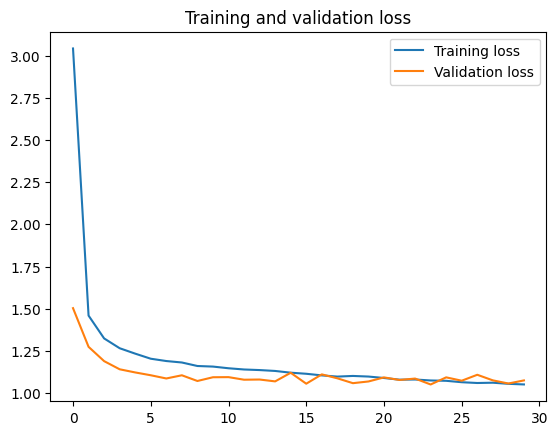

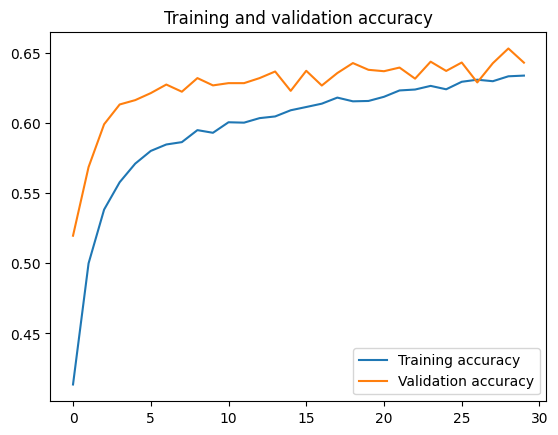

In [63]:
accuracy = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

plt.plot(accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

##### Save model

In [64]:
model.save('/content/drive/MyDrive/cifar10_tf_data_augmentation.h5')

As shown in the above graph, there is `underfitting`. Therefore, let's try `Fine-tuning with data augmentation`.

## Fine-tuning with data augmentation

In [65]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top = False,
                  input_shape=(32, 32, 3))

In [66]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [67]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [68]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 14,848,586
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [70]:
history = model.fit(
      train_generator,
      epochs=5,
      validation_data=validation_generator)

Epoch 1/5
313/313 [==============================] - 41s 107ms/step - loss: 2.2613 - accuracy: 0.2067 - val_loss: 1.8841 - val_accuracy: 0.2630
Epoch 2/5
313/313 [==============================] - 33s 107ms/step - loss: 1.8689 - accuracy: 0.2879 - val_loss: 1.6635 - val_accuracy: 0.3563
Epoch 3/5
313/313 [==============================] - 35s 111ms/step - loss: 1.6447 - accuracy: 0.3782 - val_loss: 1.5668 - val_accuracy: 0.4117
Epoch 4/5
313/313 [==============================] - 34s 107ms/step - loss: 1.4457 - accuracy: 0.4638 - val_loss: 1.3049 - val_accuracy: 0.5262
Epoch 5/5
313/313 [==============================] - 33s 106ms/step - loss: 1.3150 - accuracy: 0.5214 - val_loss: 1.1408 - val_accuracy: 0.5894


In [71]:
conv_base.trainable = True

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
      break
    else:
        layer.trainable = False

In [72]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 7,213,322
Non-trainable params: 7,635,264
_________________________________________________________________


In [73]:
history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

Epoch 1/30
313/313 [==============================] - 33s 106ms/step - loss: 1.2170 - accuracy: 0.5655 - val_loss: 1.0456 - val_accuracy: 0.6198
Epoch 2/30
313/313 [==============================] - 33s 104ms/step - loss: 1.1418 - accuracy: 0.5955 - val_loss: 0.9688 - val_accuracy: 0.6571
Epoch 3/30
313/313 [==============================] - 35s 111ms/step - loss: 1.0833 - accuracy: 0.6209 - val_loss: 0.9596 - val_accuracy: 0.6705
Epoch 4/30
313/313 [==============================] - 34s 110ms/step - loss: 1.0309 - accuracy: 0.6397 - val_loss: 0.9804 - val_accuracy: 0.6756
Epoch 5/30
313/313 [==============================] - 33s 106ms/step - loss: 0.9857 - accuracy: 0.6604 - val_loss: 0.9287 - val_accuracy: 0.6912
Epoch 6/30
313/313 [==============================] - 33s 106ms/step - loss: 0.9416 - accuracy: 0.6761 - val_loss: 0.8175 - val_accuracy: 0.7174
Epoch 7/30
313/313 [==============================] - 35s 111ms/step - loss: 0.9156 - accuracy: 0.6841 - val_loss: 0.8502 - val_ac

In [74]:
model.evaluate(test_generator)

79/79 [==============================] - 2s 19ms/step - loss: 0.6070 - accuracy: 0.8109


[0.6069801449775696, 0.8108999729156494]

##### Train VS Validation

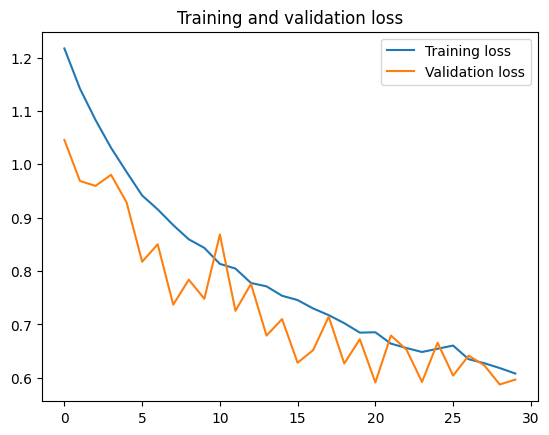

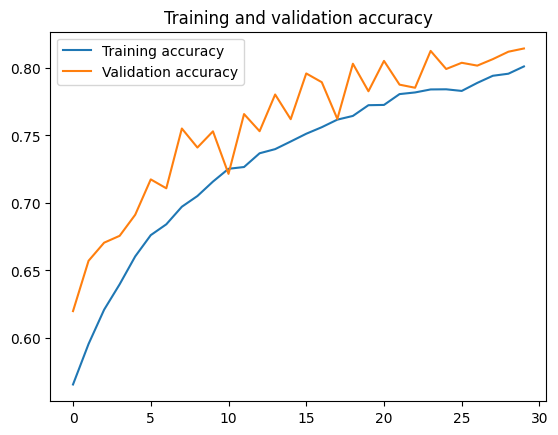

In [75]:
accuracy = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

plt.plot(accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

##### Save model

In [77]:
model.save('/content/drive/MyDrive/cifar10_fine_tuning_data_augmentation.h5')